<div style="border: 1px solid #CCCCFF; border-radius: 1px;">
<div style="margin: 5px">
<b class="alert-heading">Комментарий ревьюера</b>
<p>Дмитрий, привет!</p>
<p>Меня зовут Алексей Секоцкий. Поздравляю с подготовкой очередного проекта. Предлагаю обращаться друг к другу на «ты» если нет возражений. Ниже стандартный блок с условными обозначениями:</p>
<div class="alert alert-success" role="alert">
всё отлично
</div>
<div class="alert alert-warning" role="alert">
рекомендации на будущее (не требующие доработки проекта)
</div>
<div class="alert alert-danger" role="alert">
критичные моменты требующие внимания (доработки)
</div>
<div class="alert alert-info">
информационные комментарии и итоговый
</div>

<hr>
<p>Пожалуйста, не изменяй и не удаляй мои комментарии – они потребуются для повторной проверки (при необходимости). Задавай вопросы и описывай сделанные изменения, помечая их любым удобным наглядным способом.</p>

***Комментарий студента*** 
<div class="alert alert-info">
Привет Алексей! Спасибо за проверку моего проекта. Я действительно почему-то забыл скопировать кусок кода))) Исправляюсь. 
</div>

# Определение возраста покупателей

# Постановка задачи

***Цель:*** Построить модель, которая по фотографии определит приблизительный возраст человека с целью:
Анализа  покупок и предложения товаров, которые могут заинтересовать покупателей этой возрастной группы;
Контролировать добросовестность кассиров при продаже алкоголя..   
***Целевая метрика:*** MAE 

# Загрузка и описане данных 

***Данные взяты с сайта ChaLearn Looking at People.*** 
- Фотографии людей находятся в - /datasets/faces/ в папке /final_files
- csv-файл labels.csv с двумя колонками: file_name и real_age. Для маркировки фотографий по возрасту.

***Импортируем необходимые библиотеки*** 

<div class="alert alert-warning">
<b>Комментарий ревьюера</b>

Перед отправкой ноутбука на проверку (или сдачей заказчику) рекомендую перезапускать код. Это позволит удостовериться в правильности выполнения всех ячеек.
</div>

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import display

***Загрузим файлы***

In [3]:
labels=pd.read_csv('/datasets/faces/labels.csv') #здесь находится разметка по возрасту фотографий
datagen=ImageDataGenerator(rescale=1./255, validation_split=0.25)

train_datagen_flow=datagen.flow_from_dataframe( #создадим тренировочную выборку
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        subset='training',
        class_mode='raw',
        seed=12345)

val_datagen_flow = datagen.flow_from_dataframe( #создадим валидационную выборку
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        subset='validation',
        class_mode='raw',
        seed=12345) 

Found 5694 validated image filenames.
Found 1897 validated image filenames.


## Исследовательский анализ данных

***Выгрузим тренировочную выборку***

In [4]:
features, target = next(train_datagen_flow)
print(features.shape) 

(32, 224, 224, 3)


***Выведем размер выборки***

In [5]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


***Выведем график распределения возраста по выборке***

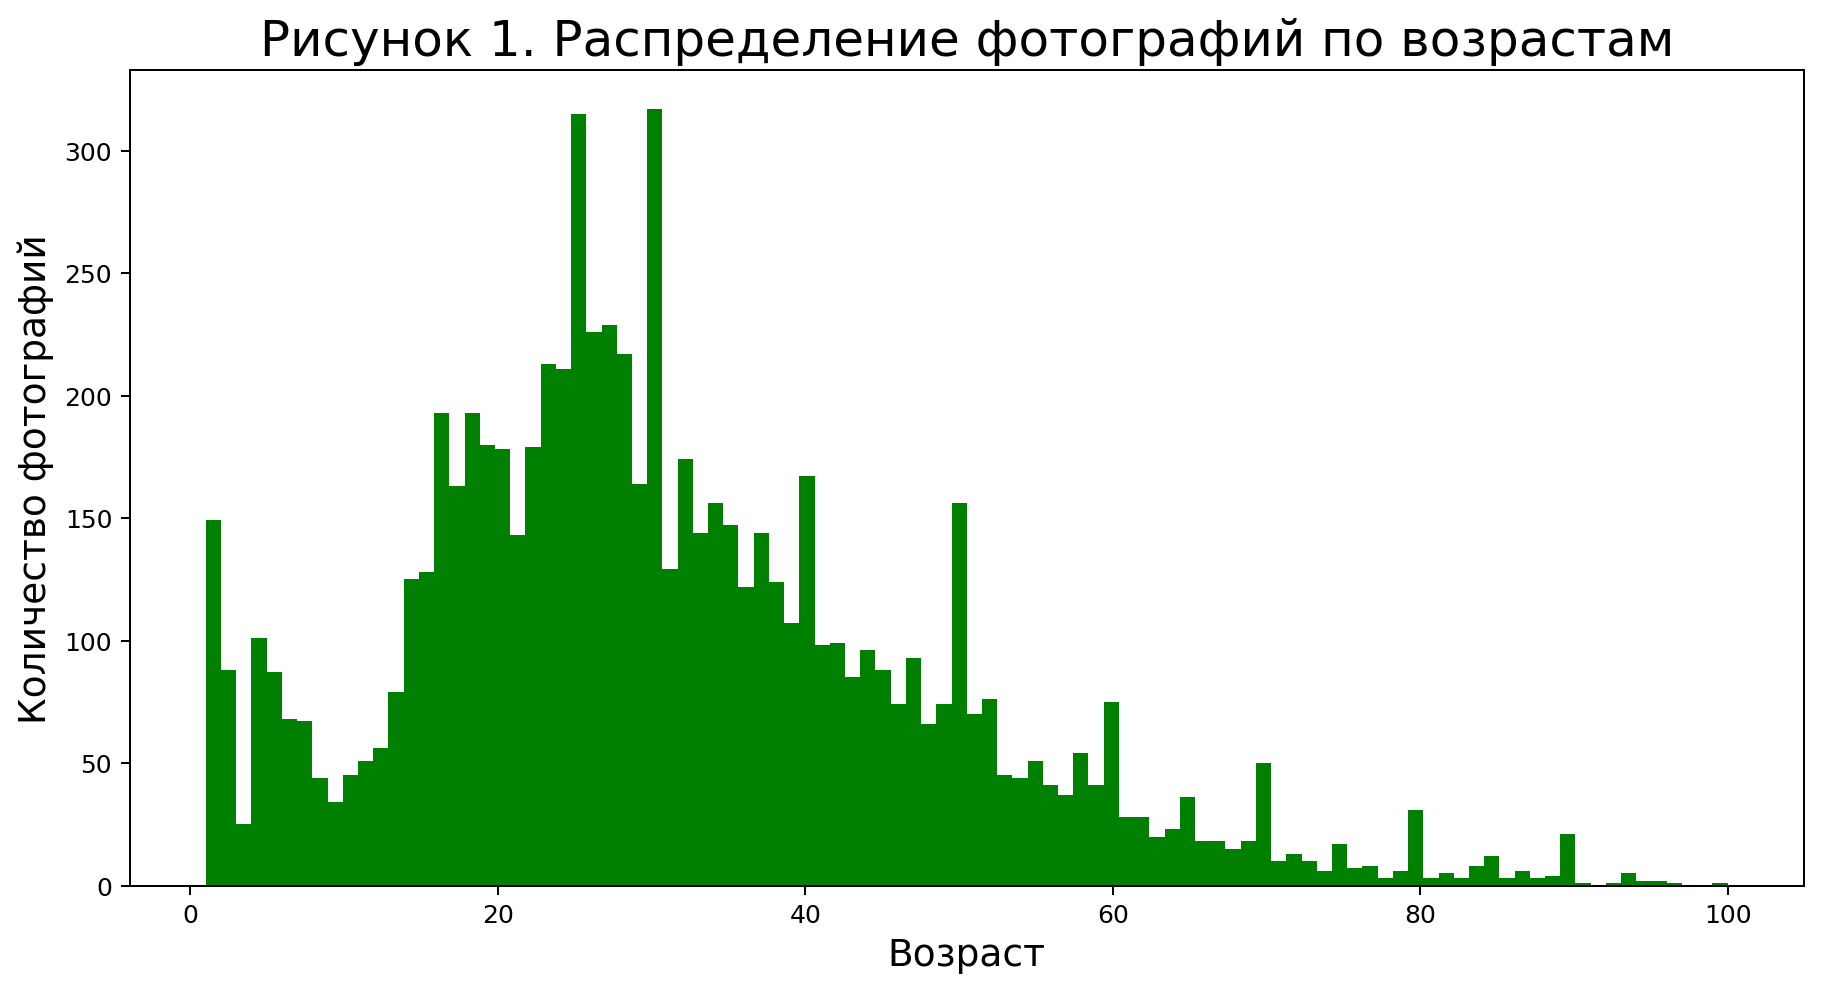

In [7]:
x=labels.real_age
plt.figure(figsize=(12,6), dpi=180)
plt.hist(x, bins=100, color='green')
plt.ylabel('Количество фотографий', fontsize = 15)
plt.xlabel('Возраст', fontsize = 15)
plt.title('Рисунок 1. Распределение фотографий по возрастам', fontsize = 20)
plt.show()

<div class="alert alert-danger">
<b>Комментарий от ревьюера</b>

Корзин маловато. У нас возраст от 1 до 100, значит и корзин надо 100 чтобы увидеть особенности распределения и потом в выводе его правильно описать.
</div>

***Комментарий студента*** 
<div class="alert alert-info">
Исправил 
</div>

***Вывыведем 15 фотографий***

In [9]:
images=[features[10], features[11], features[9], features[0], features[1], features[2],
        features[5], features[6], features[8], features[3], features[14], features[15],
        features[18], features[30], features[7]]

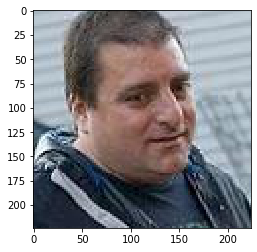

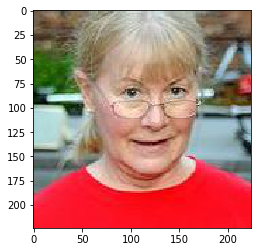

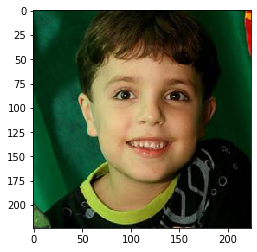

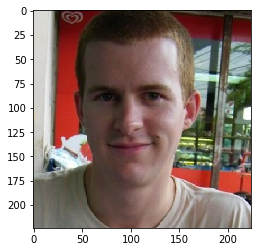

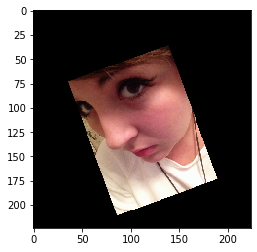

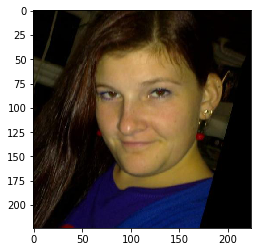

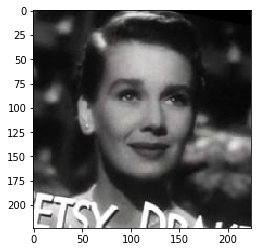

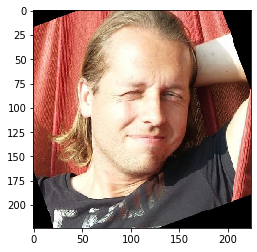

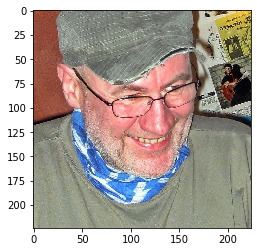

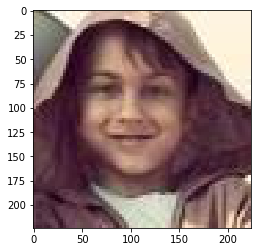

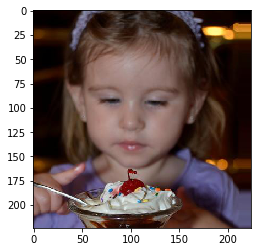

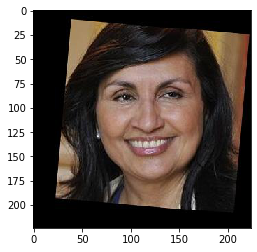

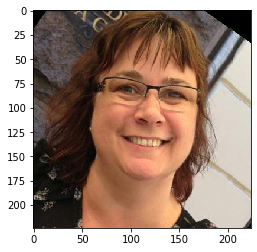

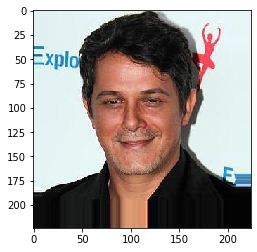

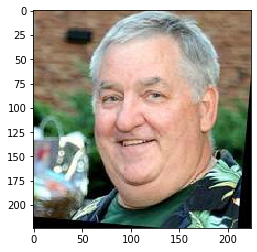

In [12]:
for i in images:
    plt.figure()
    plt.imshow(i)

<div class="alert alert-warning">
<b>Комментарий от ревьюера</b>

Можно добавить вывод возраста над каждым фото для визуальной оценки используя `plt.title()` и вывести фото в несколько рядов для компактности.
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера</b>

Здесь у нас Исследовательский анализ данных. В данном разделе должны быть следющие шаги с выводами:
1. Вывести размер всей выборки (без деления). Дать пояснения по размеру выборки (большая, маленькая, достаточная) и предложения по работе с датасетом такого размера.
2. Построить гисторграмму с распределением возрастов. Обратить внимание на пики (каждые 10 лет начиная с 20 лет), выбросы и т.п. и выдвинуть предположения почему они могли появиться.
3. Вывести 15 фото. Описать особенности увиденные на фото: цветность, качество, размер лиц, угол поворота и т.п. и предложить аугментацию (при необходимости).
<br/>

***Промежуточный вывод:***
- Размер выборки более 7500 фотографий, что может быть недостаточным. Размер выборки можно увеличить путем аугментации. 
- Прямо выбросов на гистограмме я не вижу, так как нету людей с возрастом меньше 0 и более 150 лет к примеру. Распределение близко к нормальному, но есть небольшой "хвост" в районе 60+, что может быть связано с особенностями выборки людей для фотографирования. Если посетители магазина в основном молодые люди, то модель будет адекватна, а если напрмимер основная часть пенсионеры, то можно ожидать не высоких показателей для этой категории. В общем нужно балансировать классы; 
- Фотографии представлены в разном качестве, также есть черно-белые фотографии. Мало фотографий с нерезким фокусом, пересвеченных, темных и тд. Можно предположить, что в условиях в магазина изображения не будут получаться такими качественными, а следовательно можно предложить такие типы аугментации как - размытие, добавление шумов, пересветов, затемнений. Можно сбалансировать классы, например повернув/отразив фотографии тех возрастных груп, которых в выборке меньше.

<div class="alert alert-success">
<b>Комментарий ревьюера 2</b>

Отличный вывод. Остался вопрос по гистограмме. Перестроив ее сразу станут видны особенности распределения.
</div>

***Комментарий студента*** 
<div class="alert alert-info">
Привет Алексей! Гистограмму пересторил, теперь видно, что слишком большое количестов фотографий детей (менее 10 лет), а также мало 
фото подростков. Количесво фотографий подростков нужно увеличить, так как они как раз целевая аудитория для покупки алкоголя и 
нужно научить сеть точно определять возраст для категории 12-20 лет. Здесь даже ошибка в 3 года может быть значительной. Также 
присутвуют пики в районе 3 лет (очень сомнительно что дети в этом возрасте самостоятельно покупают что-то в магазине), а также
для возрастов 25, 30, 40, 50, 60, 70, 80. Я думаю, что для лучшей работы модели нужно сгладить эти пики, убрав лишние фотографии. 
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера 3</b>

Пики – это округления при разметке. Убирать их – вопрос спорный. 7 раз отмерь – один отрежь :) Лучше аугментацией разогнать выборку.
</div>

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
 
 
def load_train(path):
    train_datagen = ImageDataGenerator(validation_split=0.25,
        rescale=1/255.)
 
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path + '/labels.csv'),
        directory=path + '/final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)
    return train_datagen_flow

def load_test(path):
    test_datagen = ImageDataGenerator(validation_split=0.25,
        rescale=1/255.)
    test_datagen_flow = test_datagen.flow_from_dataframe( 
        dataframe=pd.read_csv(path + '/labels.csv'),
        directory=path + '/final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        subset='validation',
        class_mode='raw',
        seed=12345) 
    return test_datagen_flow
    
 
def create_model(input_shape):
    optimizer = Adam(lr=0.001)
    
    model = Sequential()
    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet',
                    include_top=False)
    
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
 
    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mae'])
    return model
 
 
def train_model(model, train_data, test_data, batch_size=None, epochs=5,
                steps_per_epoch=None, validation_steps=None):
 
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
 
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
 
    return model



<div class="alert alert-warning">
<b>Комментарий ревьюера</b>

Можно добавить аугментацию, подробнее про базовые возможности в <a href="https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator">документации</a>. Почти всегда можно использовать простейшую – horizontal_flip, которая позволяет увеличить выборку в 2 раза.
</div>

```

<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 178 steps, validate for 60 steps
Epoch 1/5
2021-06-18 17:45:10.614210: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-06-18 17:45:15.320718: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 131s - loss: 224.7665 - mae: 10.8050 - val_loss: 649.5899 - val_mae: 20.5181
Epoch 2/5
178/178 - 41s - loss: 58.7871 - mae: 5.8325 - val_loss: 639.5237 - val_mae: 20.1928
Epoch 3/5
178/178 - 42s - loss: 29.4132 - mae: 4.2205 - val_loss: 285.6984 - val_mae: 12.5976
Epoch 4/5
178/178 - 41s - loss: 19.2246 - mae: 3.3694 - val_loss: 110.4633 - val_mae: 7.9742
Epoch 5/5
178/178 - 41s - loss: 14.5729 - mae: 2.9125 - val_loss: 93.3085 - val_mae: 7.2975
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 10s - loss: 93.3085 - mae: 7.2975
Test MAE: 7.2975


```

<div class="alert alert-success">
<b>Комментарий ревьюера</b>

Результат достигнут за 5 эпох. Отлично!
</div>

## Анализ обученной модели

- Средняя ошибка на тренировочной выборке составила +/- 3 года, при этом та же ошибка на тестовой выборке составила уже более 7 лет, что говорит о переобучении; 
- Ошибку можно снизить за счет увеличения количемтва эпох, так как было использовано всего 5 эпох для обучения;
- Чтобы снизить переобучение видимо необходимо заморозить часть сети; 
***Я не стал переделывать сеть и пытаться избавиться от переобучения, потому что тренажер итак еле принял мой код и я боюсь все сломать и снова сидеть часами, ждать пока обучится модель.***  

<div class="alert alert-success">
<b>Комментарий ревьюера</b>

Верно, что отмечено переобучение. От него избавиться не получится на нашем наборе фото. Метрику можно улучщить примерно до 6 применив аугментацию и немного увеличив число эпох.
</div>

<div class="alert alert-info">
<b>Итоговый комментарий ревьюера</b>

Необходимо добавить 1 раздел. Буду ждать новую версию.
<hr>
</div>

<div class="alert alert-info">
<b>Итоговый комментарий ревьюера 2</b>

Гистограмму требуется перестроить и уточнить после этого вывод в 1 разделе в ее части. Постараюсь быстро проверить.
<hr>
</div>

<div class="alert alert-info">
<b>Итоговый комментарий ревьюера 3</b>

Поздравляю с успешной подготовкой проекта. Данная тема достаточно обширная для одного спринта. Наша задача понять основы, которые при необходимости позволят погрузиться в нее без особых трудностей. Рекомендую ознакомиться с фреймворком <a href="https://pytorch.org/">PyTorch</a>. Желаю успехов в финальном спринте и профессии!

<hr>
</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Исследовательский анализ данных выполнен
- [ ]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [ ]  MAE модели не больше 8
- [ ]  Код обучения модели скопирован в финальную тетрадь
- [ ]  Результат вывода модели на экран перенесён в финальную тетрадь
- [ ]  По итогам обучения модели сделаны выводы